In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
import cv2
import numpy as np
import os

import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
import glob

In [8]:
DATASET_PATH =os.getcwd()+'\\Datasets\\hand_signs\\data'

dataset_path = os.path.join(DATASET_PATH, '*')
dataset_path = glob.glob(dataset_path)
dataset_path

['d:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\blank',
 'd:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\fist',
 'd:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\five',
 'd:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\ok',
 'd:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\thumbsdown',
 'd:\\nettech\\DeepLearning\\Datasets\\hand_signs\\data\\thumbsup']

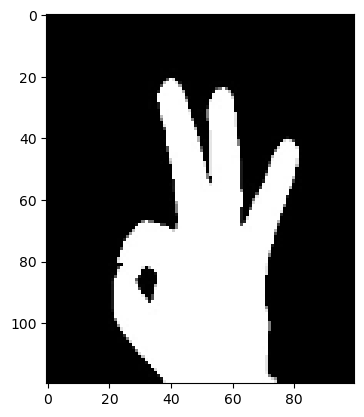

In [9]:
import cv2
image = cv2.imread(dataset_path[3] + '\\ok1.jpg')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [12]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, 6):
    dataset_path = os.getcwd()+'//Datasets//hand_signs//data//'+ str(list_of_gestures[path])
    gesture_path = os.path.join(dataset_path, '*')
    
    print(dataset_path, gesture_path)
    import glob
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            loaded_images.append(gray_image)
        k=k+1
print(len(loaded_images))

outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))


d:\nettech\DeepLearning//Datasets//hand_signs//data//blank d:\nettech\DeepLearning//Datasets//hand_signs//data//blank\*
d:\nettech\DeepLearning//Datasets//hand_signs//data//ok d:\nettech\DeepLearning//Datasets//hand_signs//data//ok\*
d:\nettech\DeepLearning//Datasets//hand_signs//data//thumbsup d:\nettech\DeepLearning//Datasets//hand_signs//data//thumbsup\*
d:\nettech\DeepLearning//Datasets//hand_signs//data//thumbsdown d:\nettech\DeepLearning//Datasets//hand_signs//data//thumbsdown\*
d:\nettech\DeepLearning//Datasets//hand_signs//data//fist d:\nettech\DeepLearning//Datasets//hand_signs//data//fist\*
d:\nettech\DeepLearning//Datasets//hand_signs//data//five d:\nettech\DeepLearning//Datasets//hand_signs//data//five\*
9600
9600


In [14]:
# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 118, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 118, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 57, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,275,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,295,750 (20.20 MB)

 Trainable params: 5,295,558 (20.20 MB)

 Non-trainable params: 192 (768.00 B)

In [15]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)
# Training the model with data
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

(7680, 100, 120, 1)
(1920, 100, 120, 1)
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - categorical_accuracy: 0.6383 - loss: 9.2022 - val_categorical_accuracy: 0.7891 - val_loss: 0.8814
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - categorical_accuracy: 0.8722 - loss: 0.3056 - val_categorical_accuracy: 0.9792 - val_loss: 0.1027
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - categorical_accuracy: 0.9008 - loss: 0.2355 - val_categorical_accuracy: 0.9651 - val_loss: 0.0763
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - categorical_accuracy: 0.9071 - loss: 0.2007 - val_categorical_accuracy: 0.9849 - val_loss: 0.0509
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - categorical_accuracy: 0.9350 - loss: 0.1473 - val_categorical_accuracy: 0.9891 - val_loss: 0.0331
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - categorical_accuracy: 0.9422 - loss: 0.1265 - val_categorical_accuracy: 0.9953 - val_loss: 0.0225
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - categori

In [17]:
model.save("hand_gesture_recognition.h5")

In [39]:
import cv2
import imutils
import numpy as np
from keras.models import load_model

# Global variables
bg = None  # Background for running average calculation

def run_avg(image, accumWeight):
    global bg
    if bg is None:
        bg = image.copy().astype("float")  # Initialize background
        return
    cv2.accumulateWeighted(image, bg, accumWeight)  # Update background with weighted average

def segment(image, threshold=30):
    global bg
    diff = cv2.absdiff(bg.astype("uint8"), image)  # Compute absolute difference between background and current frame
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]  # Apply threshold
    cnts, _ = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Find contours
    if len(cnts) == 0:
        return None  # Return None if no contours are found
    else:
        segmented = max(cnts, key=cv2.contourArea)  # Find the largest contour
        return (thresholded, segmented)  # Return the thresholded image and the largest contour

def _load_weights():
    try:
        model = load_model("hand_gesture_recognition.h5")  # Load the pre-trained model
        return model
    except Exception as e:
        print("Error loading model:", e)  # Print error if model loading fails
        return None

def getPredictedClass(model):
    image = cv2.imread('Temp.png')  # Read the saved image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray_image = cv2.resize(gray_image, (100, 120))  # Resize to the input size expected by the model
    gray_image = gray_image.reshape(1, 100, 120, 1)  # Reshape for model input
    prediction = model.predict_on_batch(gray_image)  # Predict the class
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    
    class_labels = ["Blank", "OK", "Thumbs Up", "Thumbs Down", "Punch", "High Five"]
    return class_labels[predicted_class]  # Return the predicted class label

if __name__ == "__main__":
    accumWeight = 0.8  # Weight for running average
    camera = cv2.VideoCapture(1)  # Capture video from the first camera
    fps = camera.get(cv2.CAP_PROP_FPS)  # Get the frames per second of the camera

    top, right, bottom, left = 10, 350, 225, 590  # Region of interest (ROI) for hand detection
    num_frames = 0  # Frame counter
    model = _load_weights()  # Load the model
    k = 0  # Frame counter for prediction
    current_prediction = "Blank"  # Initial prediction
    prediction_display_duration = 30  # Frames to display the prediction

    if model is None:
        print("Failed to load model. Exiting.")
        exit(1)  # Exit if model loading fails

    while True:
        grabbed, frame = camera.read()  # Capture a frame from the camera
        if not grabbed:
            break  # Exit the loop if frame not grabbed
        frame = imutils.resize(frame, width=700)  # Resize the frame
        frame = cv2.flip(frame, 1)  # Flip the frame horizontally
        clone = frame.copy()  # Make a copy of the frame
        roi = frame[top:bottom, right:left]  # Get the ROI
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # Convert ROI to grayscale
        gray = cv2.GaussianBlur(gray, (7, 7), 0)  # Apply Gaussian blur to reduce noise

        if num_frames < 30:
            run_avg(gray, accumWeight)  # Update the background model with the running average
            if num_frames == 1:
                print("[STATUS] please wait! calibrating...")
            elif num_frames == 29:
                print("[STATUS] calibration successful...")
        else:
            hand = segment(gray)  # Segment the hand region
            if hand is not None:
                thresholded, segmented = hand
                cv2.drawContours(clone, [segmented + (right, top)], -1, (0, 0, 255))  # Draw contours around the hand
                if k % (fps // 6) == 0:  # Every 6th frame, save the thresholded image and predict
                    cv2.imwrite('Temp.png', thresholded)
                    current_prediction = getPredictedClass(model)
                    k = 0
                cv2.imshow("Thresholded", thresholded)  # Show the thresholded image
            else:
                current_prediction = "Blank"  # No hand detected

            if k < prediction_display_duration:  # Display the prediction for a set duration
                cv2.putText(clone, str(current_prediction), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        k += 1  # Increment the frame counter for prediction
        num_frames += 1  # Increment the total frame counter
        cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)  # Draw a rectangle around the ROI
        cv2.imshow("Video Feed", clone)  # Show the video feed
        keypress = cv2.waitKey(1) & 0xFF  # Wait for a key press
        if keypress == ord("q"):  # Exit if 'q' is pressed
            break

    camera.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows


[STATUS] please wait! calibrating...
[STATUS] calibration successful...
